# Sample Checking Transactions Processing and Loading
Below is an example of how transactions from my checking account are transformed into a format that
can be loaded into the "spend_save" database, then loaded into the database. May 2023 transactions are loaded
and processed in this example. Due to the sensitive nature of this data, any amounts have been changed
to a random number and any sensitive material (such as bank account numbers) have been removed. However,
this data still closely resembles real transactions.

This example will show the input transactions CSV file, the output DataFrames generated via the "savings_file_cleanup" function, and how the data is loaded into the database using the "to_spend_save" function. To see the details of the functions, view [transactions_cleanining_functions](transactions_cleaning_functions.py)
and navigate to the desired function.

## Input
Input file in the form of CSV containing all May 2023 checking account transactions.

In [1]:
# Import function and needed packages
import pandas as pd
from transactions_processing_functions import checking_file_cleanup, to_spend_save

In [2]:
# Raw input file extracted bank website
input_file = r"C:\Users\weism\OneDrive\life stuff\Personal Projects\Personal Finance Database\bank data\checking_transactions_may2023.CSV"
pd.read_csv(input_file, encoding='unicode_escape', index_col=False)

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #
0,DEBIT,5/30/2023,Online Transfer to SAV 0000 transaction#: 000...,-500.00,ACCT_XFER,2782.47,NaN
1,DEBIT,5/30/2023,Payment to Chase card ending in 0000 05/31,-427.29,LOAN_PMT,2355.18,NaN
2,CREDIT,5/30/2023,GUSTO PAYROLL PAY 000000 PP...,788.48,ACH_CREDIT,3143.66,NaN
3,DEBIT,5/29/2023,Payment to Chase card ending in 0000 05/29,-289.89,LOAN_PMT,2853.77,NaN
4,DEBIT,5/15/2023,VENMO PAYMENT 0000000 WEB ID: ...,-48.00,ACH_DEBIT,2805.77,NaN
5,DEBIT,5/15/2023,VENMO PAYMENT 0000000 WEB ID: ...,-22.00,ACH_DEBIT,2783.77,NaN
6,DEBIT,5/14/2023,Payment to Chase card ending in 0000 05/14,-428.31,ACCT_XFER,2355.46,NaN
7,DEBIT,5/14/2023,Online Transfer to SAV 0000 transaction#: 000...,-480.00,ACCT_XFER,1875.46,NaN
8,DEBIT,5/14/2023,Payment to Chase card ending in 0000 05/14,-572.74,ACCT_XFER,1302.72,NaN
9,CREDIT,5/14/2023,GUSTO PAYROLL PAY 000000 PP...,872.89,ACH_CREDIT,2175.61,NaN


## Processing
Processing the input CSV file using checking_file_cleanup. The function takes a CSV file as an argument and produces two results: "checking_df" containing the transactions that were able to be automatically processed with the function, and "checking_review_df" which contains transactions needing manual review. The "checking_review_df" is printed by the function to show all transactions needing review.

In [3]:
# Process the input CSV file using savings_file_cleanup
checking_df, checking_review_df = checking_file_cleanup(input_file)

Transactions successfully transformed.The following transactions need to be reviewed.Once values have been assigned to transaction_type_id and category_id (or a null category_id),use to_spend_save() to update database.
  short_date  account_id  transaction_type_id  category_id  \
0 2023-05-15           2                    0            0   
1 2023-05-15           2                    0            0   

                             transaction_description  transaction_amount  
0  venmo            payment    0000000   web id: ...               -48.0  
1  venmo            payment    0000000   web id: ...               -22.0  


## Output
See the output of "checking_review_df" and "checking_df" below. It can be seen that there are two "venmo payment" transactions that need to be manually assigned a category, then appended back to "checking_review_df".

In [4]:
# Transactions needing review (if any)
checking_review_df

,short_date,account_id,transaction_type_id,category_id,transaction_description,transaction_amount
0,2023-05-15,2,0,0,venmo payment 0000000 web id: ...,-48.0
1,2023-05-15,2,0,0,venmo payment 0000000 web id: ...,-22.0


In [5]:
# Transactions that were able to be processed automatically
# All have null category_ids since none of these transactions are purchases
checking_df

,short_date,account_id,transaction_type_id,category_id,transaction_description,transaction_amount
0,2023-05-30,2,5,<NA>,online transfer to sav 0000 transaction#: 000...,-500.00
1,2023-05-30,2,8,<NA>,payment to chase card ending in 0000 05/31,-427.29
2,2023-05-30,2,3,<NA>,gusto payroll pay 000000 pp...,788.48
3,2023-05-29,2,8,<NA>,payment to chase card ending in 0000 05/29,-289.89
4,2023-05-14,2,8,<NA>,payment to chase card ending in 0000 05/14,-428.31
5,2023-05-14,2,5,<NA>,online transfer to sav 0000 transaction#: 000...,-480.00
6,2023-05-14,2,8,<NA>,payment to chase card ending in 0000 05/14,-572.74
7,2023-05-14,2,3,<NA>,gusto payroll pay 000000 pp...,872.89


In [6]:
# Assign appropriate transaction_type_id and category_id after reviewing
# Found both as "debit purchases" (transaction_type_id #6) for food & drink" (category_id #2)
checking_review_df[["transaction_type_id", "category_id"]] = [6, 2]

In [7]:
# Append to checking_df
checking_df = pd.concat([checking_df, checking_review_df]).reset_index(drop=True)

In [8]:
# View appended transactions as last 2 transactions
checking_df

,short_date,account_id,transaction_type_id,category_id,transaction_description,transaction_amount
0,2023-05-30,2,5,<NA>,online transfer to sav 0000 transaction#: 000...,-500.00
1,2023-05-30,2,8,<NA>,payment to chase card ending in 0000 05/31,-427.29
2,2023-05-30,2,3,<NA>,gusto payroll pay 000000 pp...,788.48
3,2023-05-29,2,8,<NA>,payment to chase card ending in 0000 05/29,-289.89
4,2023-05-14,2,8,<NA>,payment to chase card ending in 0000 05/14,-428.31
5,2023-05-14,2,5,<NA>,online transfer to sav 0000 transaction#: 000...,-480.00
6,2023-05-14,2,8,<NA>,payment to chase card ending in 0000 05/14,-572.74
7,2023-05-14,2,3,<NA>,gusto payroll pay 000000 pp...,872.89
8,2023-05-15,2,6,2,venmo payment 0000000 web id: ...,-48.00
9,2023-05-15,2,6,2,venmo payment 0000000 web id: ...,-22.00


In [10]:
# checking_review_df would be updated manually and appended to savings_df for loading into database
savings_df = pd.concat([checking_df, checking_review_df])

### Loading Data into Database

After manually processing any data in "checking_review_df", checking_review_df is appended to "checking_df" and then loaded into the database
using "to_spend_save". This function connects and loads the DataFrame into the "spend_save" database using sqlalchemy. The function's argument include:
1. **df** (pandas.DataFrame): A DataFrame to be loaded into the database
2. **data_source** (str): The name of the data source (savings, checking, or credit card data)
3. **password** (str): The password of the MySQL database server

Once the data has been successfully loaded into the database, a CSV containing the loaded data is saved as backup.

Note: Database server password has been replaced with *** after running the below code.

In [11]:
# Load data into spend_save
to_spend_save(checking_df, "checking", "password")

checking data successfully loaded into spend_save MySQL database
CSV file saved as checking_2023-06-20.csv


Transactions can now be seen in MySQL database

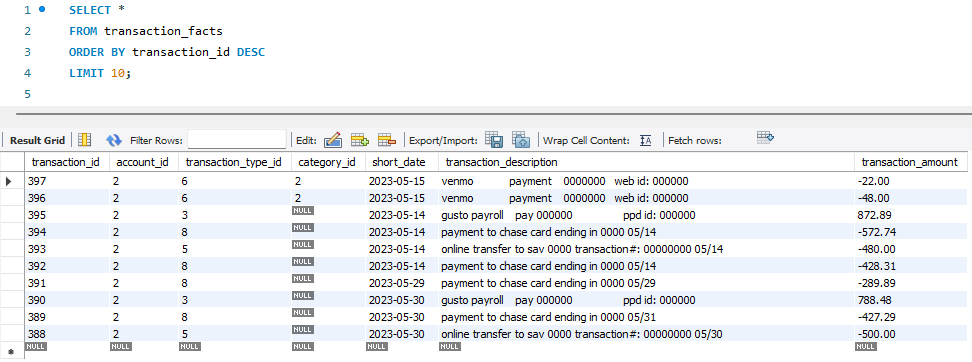